In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
ds=pd.read_csv(r'C:\Users\User\Desktop\new datasets\Mall_Customers.csv')

In [4]:
ds.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
ds.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [11]:
ds.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [12]:
ds.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [13]:
ds.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB


In [15]:
ds.isnull().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
ds['Annual Income (k$)'].nunique()

64

In [22]:
ds['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

Text(0, 0.5, 'Annual Income (k$)')

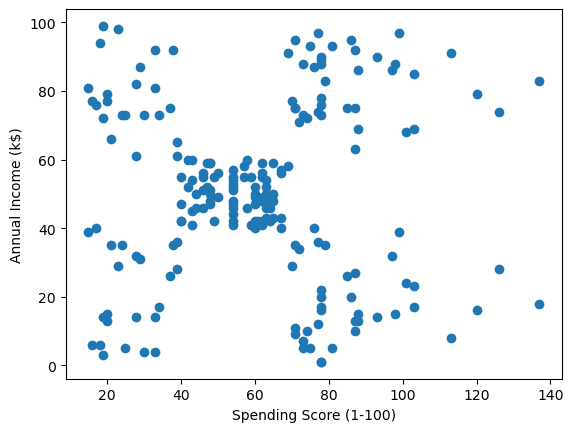

In [33]:
plt.scatter(ds['Annual Income (k$)'],ds['Spending Score (1-100)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')

In [29]:
model=KMeans(n_clusters=5)
y_pred = model.fit_predict(ds[['Annual Income (k$)', 'Spending Score (1-100)']])
y_pred

D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [30]:
ds['cluster']=y_pred

In [32]:
ds.head(25)

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2
5,17,76,4
6,18,6,2
7,18,94,4
8,19,3,2
9,19,72,4


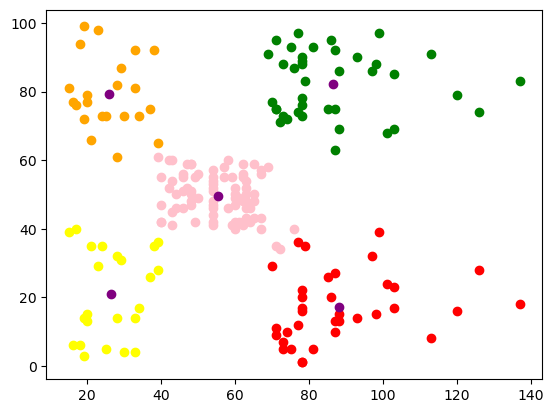

In [35]:
ds1=ds[ds.cluster==0]
ds2=ds[ds.cluster==1]
ds3=ds[ds.cluster==2]
ds4=ds[ds.cluster==3]
ds5=ds[ds.cluster==4]

plt.scatter(ds1['Annual Income (k$)'],ds1['Spending Score (1-100)'],color = 'red')
plt.scatter(ds2['Annual Income (k$)'],ds2['Spending Score (1-100)'],color = 'green')
plt.scatter(ds3['Annual Income (k$)'],ds3['Spending Score (1-100)'],color = 'yellow')
plt.scatter(ds4['Annual Income (k$)'],ds4['Spending Score (1-100)'],color = 'pink')
plt.scatter(ds5['Annual Income (k$)'],ds5['Spending Score (1-100)'],color = 'orange')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple')

In [36]:
from sklearn.preprocessing import MinMaxScaler
model=MinMaxScaler()
ds['Annual Income (k$)']=model.fit_transform(ds[['Annual Income (k$)']])
ds['Spending Score (1-100)']=model.fit_transform(ds[['Spending Score (1-100)']])

In [37]:
ds.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,0.000000,0.387755,2
1,0.000000,0.816327,4
2,0.008197,0.051020,2
3,0.008197,0.775510,4
4,0.016393,0.397959,2


In [49]:
model=KMeans(n_clusters=8)
y_predicted = model.fit_predict(ds[['Annual Income (k$)', 'Spending Score (1-100)']])
y_predicted

D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 0, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 4, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 7, 0, 0, 7, 7, 0, 7, 0, 0,
       0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 2, 7, 2, 1, 2, 1, 2,
       7, 2, 1, 2, 1, 2, 1, 2, 1, 2, 7, 2, 1, 2, 7, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 7, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 5])

In [52]:
ds['clusters']=y_predicted

In [53]:
ds.head()

,Annual Income (k$),Spending Score (1-100),cluster,clusters
0,0.000000,0.387755,2,3
1,0.000000,0.816327,4,4
2,0.008197,0.051020,2,3
3,0.008197,0.775510,4,4
4,0.016393,0.397959,2,3


In [54]:
model.cluster_centers_

array([[0.25848265, 0.51898434],
       [0.5342772 , 0.11920223],
       [0.51668618, 0.82543732],
       [0.08313817, 0.18901846],
       [0.08155738, 0.81632653],
       [0.76378539, 0.83395176],
       [0.77622951, 0.21428571],
       [0.39581056, 0.46099773]])

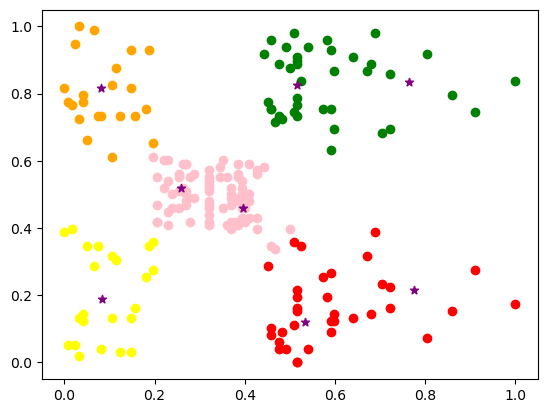

In [55]:
ds1=ds[ds.cluster==0]
ds2=ds[ds.cluster==1]
ds3=ds[ds.cluster==2]
ds4=ds[ds.cluster==3]
ds5=ds[ds.cluster==4]
ds6=ds[ds.cluster==5]
ds7=ds[ds.cluster==6]
ds8=ds[ds.cluster==7]

plt.scatter(ds1['Annual Income (k$)'],ds1['Spending Score (1-100)'],color = 'red')
plt.scatter(ds2['Annual Income (k$)'],ds2['Spending Score (1-100)'],color = 'green')
plt.scatter(ds3['Annual Income (k$)'],ds3['Spending Score (1-100)'],color = 'yellow')
plt.scatter(ds4['Annual Income (k$)'],ds4['Spending Score (1-100)'],color = 'pink')
plt.scatter(ds5['Annual Income (k$)'],ds5['Spending Score (1-100)'],color = 'orange')
plt.scatter(ds6['Annual Income (k$)'],ds6['Spending Score (1-100)'],color = 'blue')
plt.scatter(ds7['Annual Income (k$)'],ds7['Spending Score (1-100)'],color = 'white')
plt.scatter(ds8['Annual Income (k$)'],ds8['Spending Score (1-100)'],color = 'blue')


plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='purple',marker='*')

In [56]:
sse=[]
k_rng = range(1,10)
for i in k_rng:
    model=KMeans(n_clusters=5)
    model.fit(ds[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(model.inertia_)

D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Users\User\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can

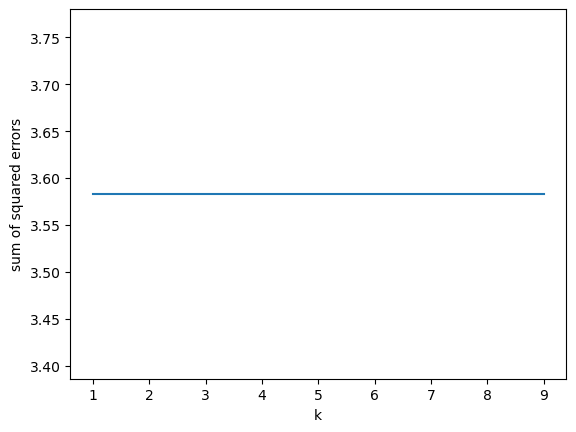

In [57]:
plt.xlabel('k')
plt.ylabel('sum of squared errors')
plt.plot(k_rng,sse)